In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_SVC(model, X, y, title='SVC', margins=False, support_vectors=False, fill=False, s=20):
    # mesh
    h=0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    fig = plt.figure(figsize=(10, 10))
    
    # color plot
    if fill:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=s, cmap=plt.cm.coolwarm)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    
    # hyperplane
    w = model.coef_[0]
    b = model.intercept_[0]
    x_points = np.linspace(x_min, x_max)
    y_points = -(w[0] / w[1]) * x_points - b / w[1]
    if (h * 300 > 1.5 and fill):
        plt.plot(x_points, y_points, c='k', linewidth=h*300)
    else:
        plt.plot(x_points, y_points, c='k')
    
    # support vectors
    if support_vectors:
        plt.scatter(model.support_vectors_[:, 0],
                    model.support_vectors_[:, 1],
                    facecolors='none',
                    s=s*4,
                    edgecolors='k',
                    alpha=0.5
        )
    
    # margins
    if margins:
        w_hat = model.coef_[0] / (np.sqrt(np.sum(model.coef_[0] ** 2)))
        margin = 1 / np.sqrt(np.sum(model.coef_[0] ** 2))
        
        decision_boundary_points = np.array(list(zip(x_points, y_points)))
        margin_right_points = decision_boundary_points + w_hat * margin
        margin_left_points = decision_boundary_points - w_hat * margin

        plt.plot(margin_right_points[:, 0], margin_right_points[:, 1], 'k--', alpha=0.5, linewidth=2)
        plt.plot(margin_left_points[:, 0], margin_left_points[:, 1], 'k--', alpha=0.5, linewidth=2)
    
    plt.show()

In [3]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, shuffle=True, noise=0.1, random_state=42)

In [4]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

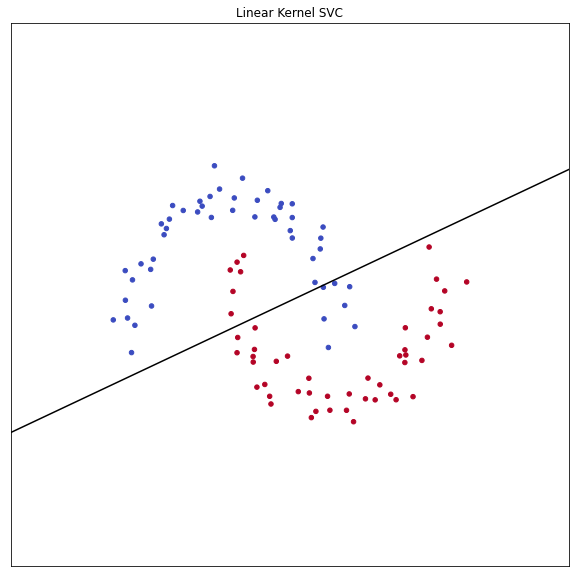

In [5]:
# display hyperplane only
plot_SVC(clf, X, y, 'Linear Kernel SVC')

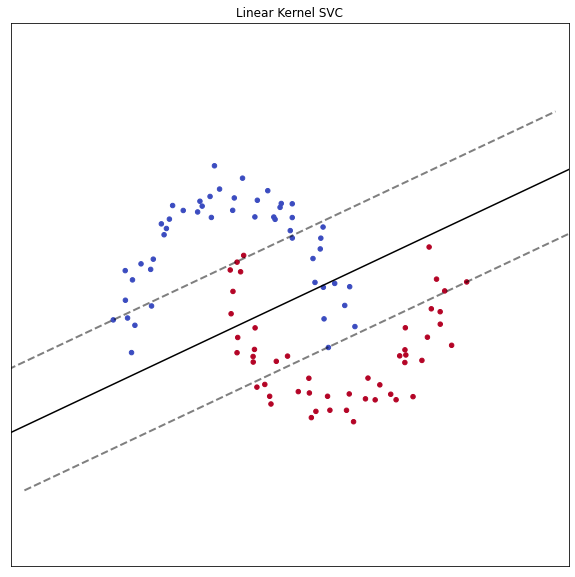

In [6]:
# display margins
plot_SVC(clf, X, y, 'Linear Kernel SVC', margins=True)

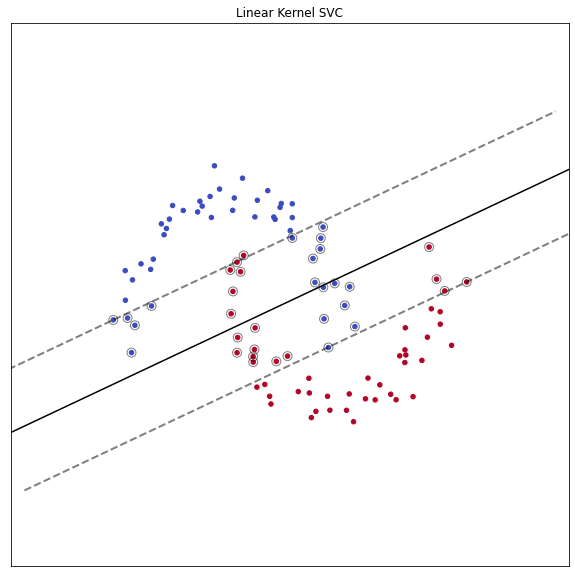

In [7]:
# highlight support vectors
plot_SVC(clf, X, y, 'Linear Kernel SVC', margins=True, support_vectors=True)

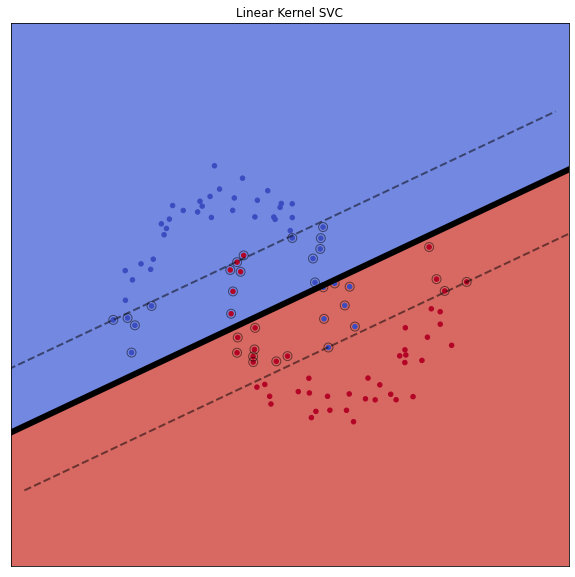

In [8]:
# fill background
plot_SVC(clf, X, y, 'Linear Kernel SVC', margins=True, support_vectors=True, fill=True)